### Đọc và xử lý dữ liệu

In [176]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [177]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [178]:
color_sns = ['#4C72B0','#DC8452','#55a868','#C44E52','#8171B3','#937860','#DA8BC3','#8C8C8C','#CCB974','#64B5CD']

In [179]:
cars = pd.read_csv('Case_study_CarPrice_Assignment.csv') 
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [180]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe

##### Các thuộc tính Category

- 'carbody'
- 'fueltype'
- 'symboling'
- 'enginetype'
- 'doornumber'
- 'aspiration'
- 'cylindernumber'
- 'enginelocation'
- 'fuelsystem'
- 'drivewheel'

##### Các thuộc tính định lượng
- 'carlength'
- 'carwidth'
- 'carheight'
- 'curbweight'
- 'enginesize'
- 'boreratio'
- 'stroke'
- 'compressionratio'
- 'horsepower'
- 'peakrpm'
- 'wheelbase'
- 'citympg'
- 'highwaympg'

In [181]:
len(cars['CarName'].unique())

147

205 dòng dữ liệu nhưng chỉ có 147 tên xe. Check duplicate.

In [182]:
cars.duplicated().value_counts()

False    205
dtype: int64

Cùng một tên xe nhưng thay đổi phụ kiện có thể ảnh hưởng đến giá xe.

Nhận thấy chưa có cột brand, nhưng tên hãng xe là từ đầu tiên trong tên xe

In [183]:
companies = cars['CarName'].apply(lambda x: x.split(' ')[0])
companies.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Có một số lỗi nhập liệu làm số hãng xe tăng lên so với thực tế

In [184]:
cars.insert(3,'brand',companies)
cars.head()

,car_ID,symboling,CarName,brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [185]:
def replace_name(after, before):
    for i in range(0,len(after)):
        a = after[i]
        b = before[i]
        cars.brand.replace(b,a,inplace=True)

In [186]:
b = ['maxda','porcshce','toyouta','vokswagen','vw','Nissan']
a = ['mazda','porsche','toyota','volkswagen','volkswagen','nissan']
replace_name(a,b)
print(cars.brand.unique())
print(f'Sau khi sử lý còn lại {len(cars.brand.unique())} hãng xe')

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
Sau khi sử lý còn lại 22 hãng xe


### 1 Giá xe

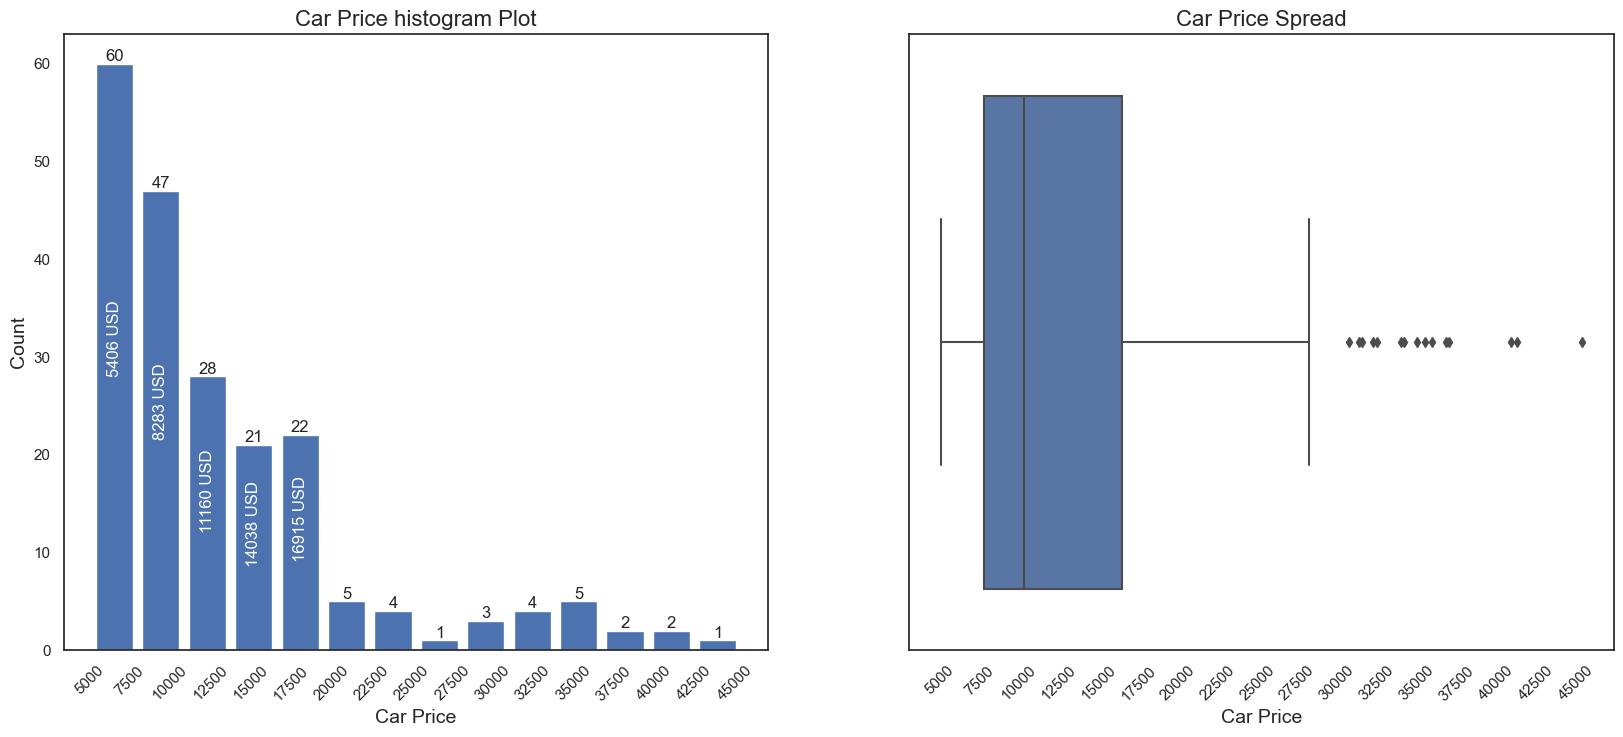

In [187]:
sns.set_theme(style = 'white')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price histogram Plot',fontsize = 16)
n, bins, patches = plt.hist(cars.price,bins = 14,rwidth = 0.8,align='mid',color = color_sns[0])
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()
    v = patch.get_x()
    plt.text(patch.get_x() + patch.get_width()/2, height, str(int(height)), ha='center', va='bottom')
    if height>20:
        plt.text(patch.get_x() + patch.get_width()/2, height/2-2, str(int(round(v,0))) + ' USD',
        ha='center', va='bottom',rotation=90,color='White')

plt.subplot(1,2,2) 
plt.title('Car Price Spread',fontsize = 16) 
sns.boxplot(x=cars.price)
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.show()

In [188]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

- Độ lệch chuẩn ~ 8000 USD
- Giá trung bình khoảng 13000 USD/ chiếc
- Tập trung ở phân khúc giá rẻ nhiều (5000-10000 USD/chiếc)
- Phân khúc tầm trung khoảng 10000-20000 USD/chiếc

### 2 Các thuộc tính category

#### 2.1 brand, fueltype, carbody

In [189]:
car_count = cars.brand.value_counts().to_dict()
v = cars.groupby(['brand','fueltype'])['fueltype'].count().to_dict()
di_dict = {}
gas_dist = {}
for i in v.keys():
    if i[1] == 'diesel':
        di_dict[i[0]] = v.get(i)
    else:
        if i[0] not in list(di_dict.keys()):
            di_dict[i[0]] = 0

    if i[1] == 'gas':
        gas_dist[i[0]] = v.get(i)
    else:
        if i[0] not in list(gas_dist.keys()):
            gas_dist[i[0]] = 0

list_brand = list(car_count.keys())
di_dict = {i : di_dict[i] for i in list_brand}
gas_dist = {i : gas_dist[i] for i in list_brand}

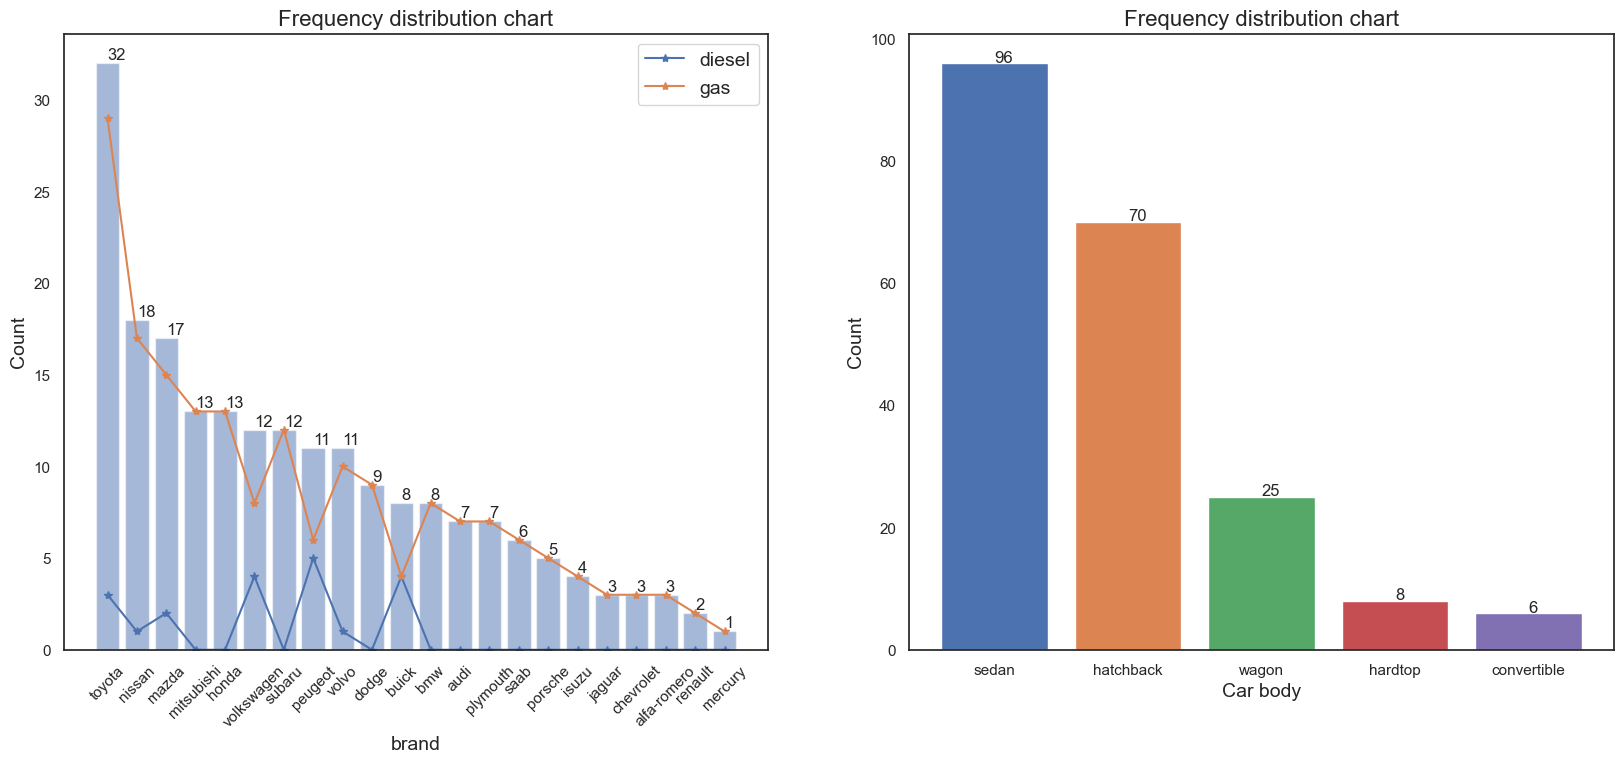

In [190]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 

pathcher = plt.bar(list(car_count.keys()),list(car_count.values()),alpha = 0.5)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.plot(list(car_count.keys()),list(di_dict.values()),label = 'diesel',color=color_sns[0],marker = '*')
plt.plot(list(car_count.keys()),list(gas_dist.values()),label = 'gas',color=color_sns[1],marker = '*')
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('brand',fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize = 14)
plt.legend(fontsize = 14,loc = 'upper right')

plt.subplot(1,2,2) 
carbody_count = cars.carbody.value_counts().to_dict()
pathcher =plt.bar(list(carbody_count.keys()),list(carbody_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('Car body',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()


In [191]:
carbody_ser = cars.groupby(['carbody'])['price'].mean().sort_values()
brand_ser = cars.groupby(['brand'])['price'].mean().sort_values()
fueltype_ser = cars.groupby(['fueltype'])['price'].mean().sort_values()

In [192]:
def show_barchart(seri,chartname,xlabel,ylabel,rotation = 0,textrotation = 0,height = 1,color = 0):
    plt.figure(figsize=(6,6))
    color = color_sns if color==0 else color_sns[0]
    pathcher = plt.bar(list(seri.index),list(seri.values),color = color)
    color = 'white' if height != 1 else 'black'
    for i in pathcher:
        plt.text(i.get_x()+i.get_width()/2-0.2, i.get_height()/height,
                str((round(i.get_height(),2))),
                fontsize = 10,rotation=textrotation,color = color)
    plt.title(chartname,fontsize = 16)
    plt.xlabel(xlabel,fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.xticks(rotation = rotation)
    plt.show()

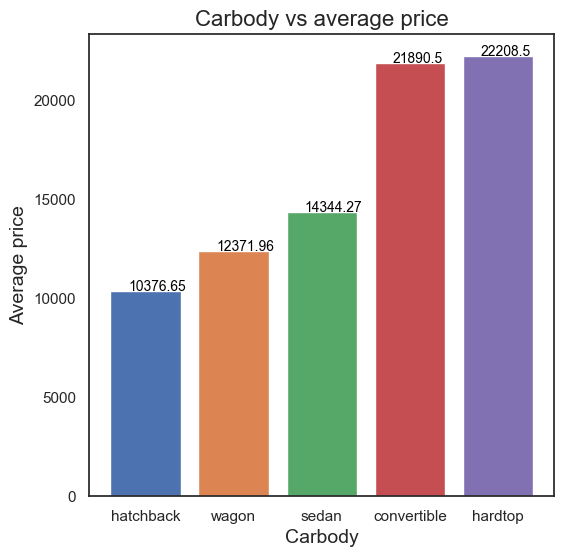

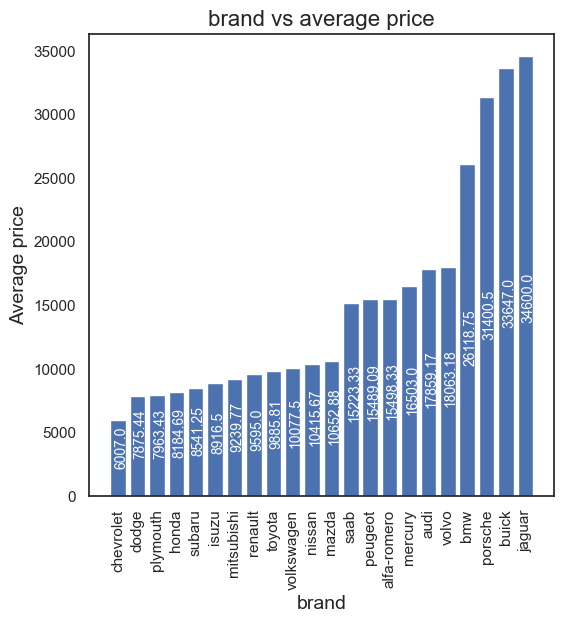

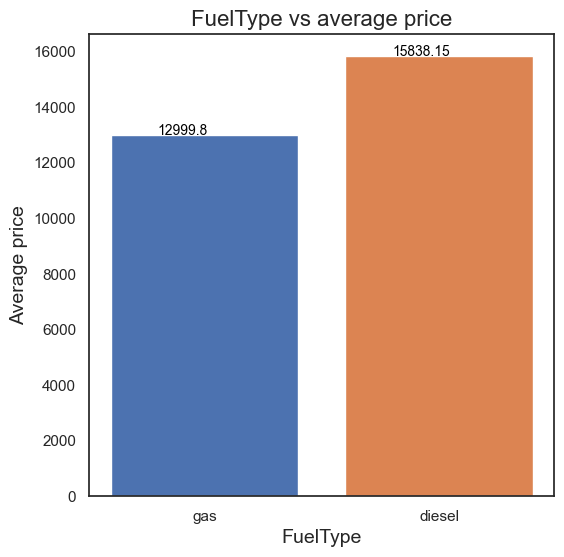

In [193]:
show_barchart(carbody_ser,'Carbody vs average price','Carbody','Average price')
show_barchart(brand_ser,'brand vs average price','brand','Average price',90,90,2.5,1)
show_barchart(fueltype_ser,'FuelType vs average price','FuelType','Average price')

- Toyota là hãng xe chiếm thị phần cao nhất.
- Loại thân xe Sedan, hatchback bán chạy nhất.
- Xe sử dụng loại nhiên liệu gas bán chạy hơn nhiều so với xe sử dụng loại nhiên liệu diesel.
- Jaguar và Buick có giá trị trung bình cao nhất.
- Hardtop và Convertible có giá trung bình cao hơn các loại khác.

#### 2.2 Symboling

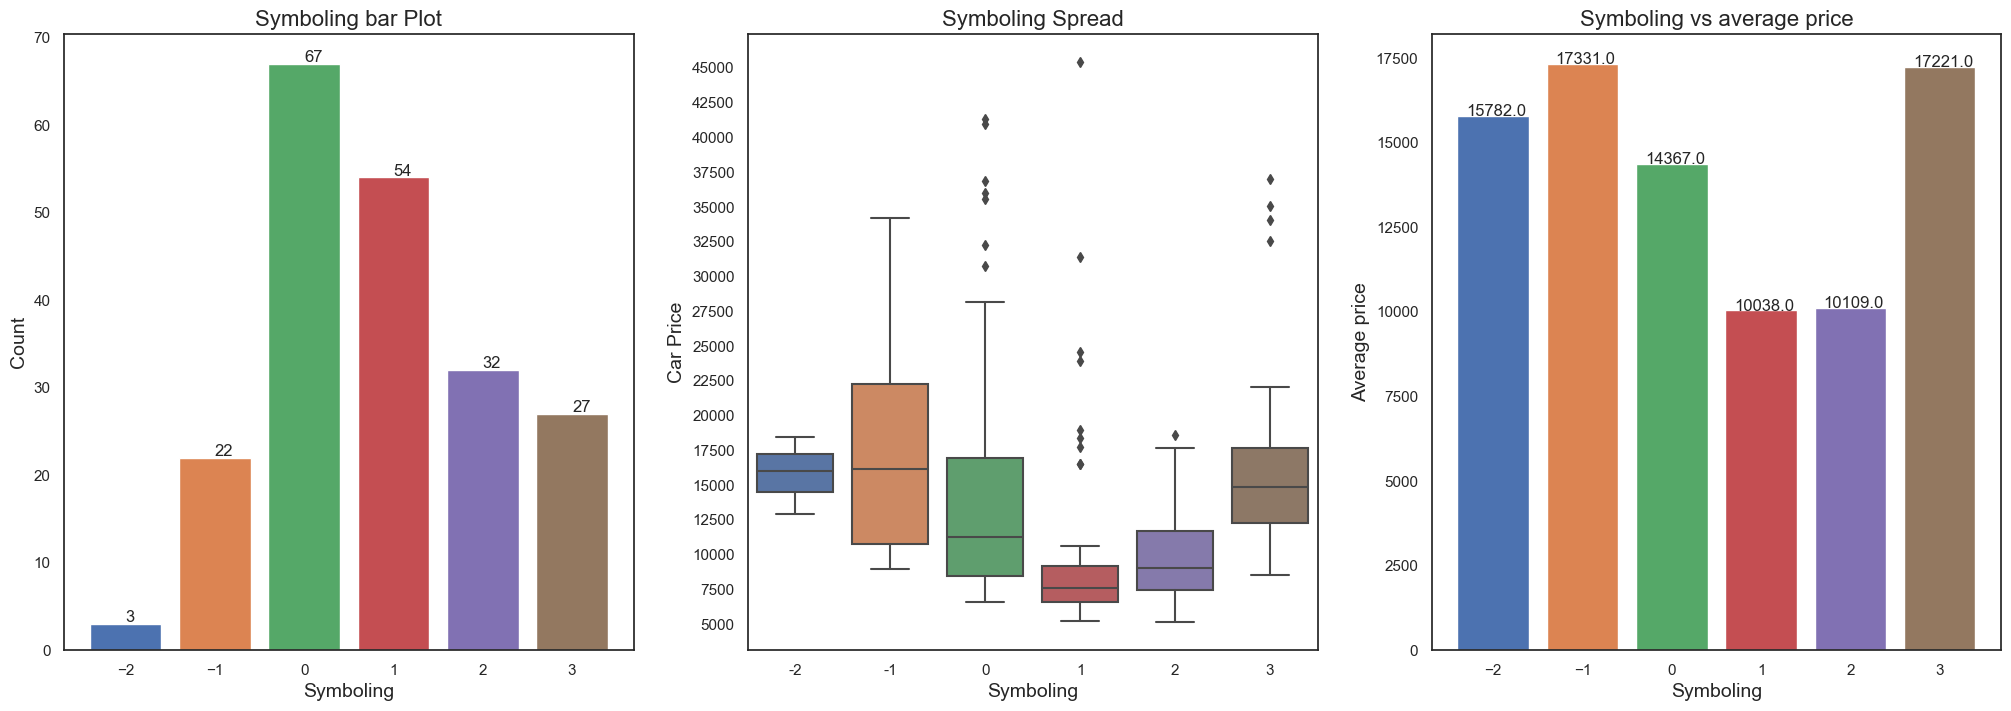

In [194]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Symboling bar Plot',fontsize = 16)
symbol_count = cars.symboling.value_counts().to_dict()
symbol_count = dict(sorted(symbol_count.items(), key=lambda x: x[0]))
pathcher =plt.bar(list(symbol_count.keys()),list(symbol_count.values()),color=color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Count',fontsize = 14)


plt.subplot(1,3,2) 
plt.title('Symboling Spread',fontsize = 16) 
sns.boxplot(x=cars.symboling,y=cars.price)
plt.yticks([i for i in range(5000,47500,2500)])
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
symboling_ser = cars.groupby(['symboling'])['price'].mean()
pathcher = plt.bar(list(symboling_ser.index),list(symboling_ser.values),color=color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2-0.3, i.get_height()+0.2,
             str((round(i.get_height(),0))),
             fontsize = 12)
plt.title('Symboling vs average price',fontsize = 16)
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)

plt.show()



- Đa số các hãng xe sản xuất xe có mức độ an toàn Symboling nằm khoảng 0 đến 1.

#### 2.3 enginetype

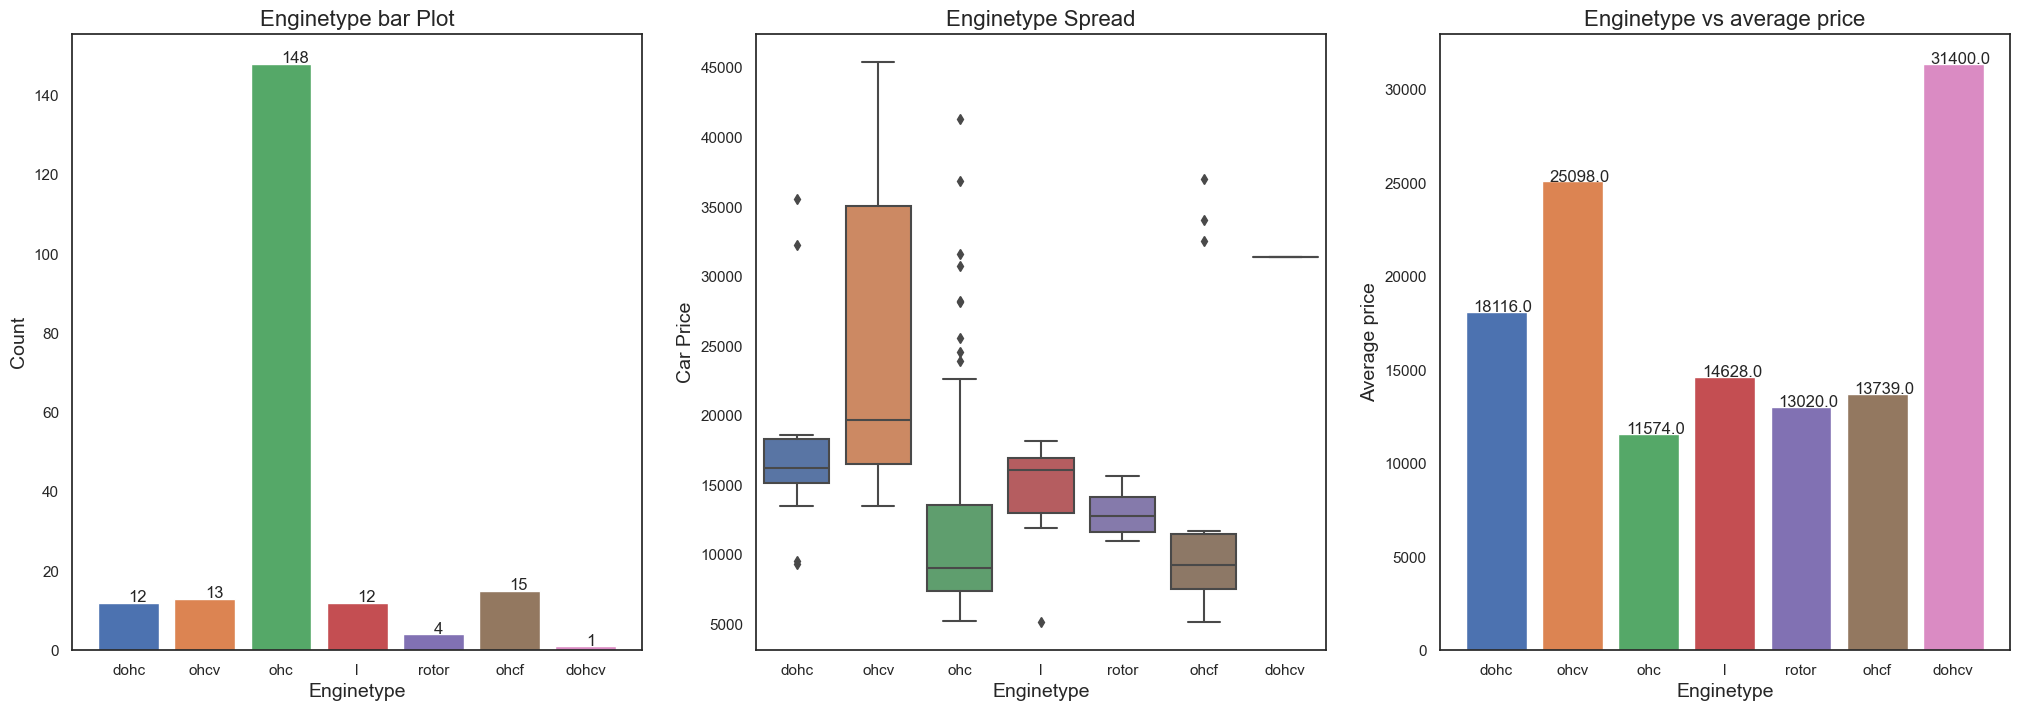

In [195]:
sns.set_theme(style = 'white')

order=list(cars.enginetype.unique())

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Enginetype bar Plot',fontsize = 16)
enginetype_count = cars.enginetype.value_counts().to_dict()
enginetype_count = dict(sorted(enginetype_count.items(), key=lambda x: order.index(x[0])))
pathcher =plt.bar(list(enginetype_count.keys()),list(enginetype_count.values()),color=color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Enginetype Spread',fontsize = 16) 
sns.boxplot(x=cars.enginetype,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
enginetype_ser = cars.groupby(['enginetype'])['price'].mean().to_dict()
enginetype_ser = dict(sorted(enginetype_ser.items(), key=lambda x: order.index(x[0])))
pathcher =plt.bar(list(enginetype_ser.keys()),list(enginetype_ser.values()),color=color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2-0.3, i.get_height()+0.2,
             str((round(i.get_height(),0))),
             fontsize = 12)
plt.title('Enginetype vs average price',fontsize = 16)
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)

plt.show()

- Loại động cơ OHC được ưa thích nhất
- Loại động cơ OHCV có khoảng giá cao nhất
- Loại động cơ OHC và OHCF có khoảng giá thấp nhất

#### 2.4 Doornumber

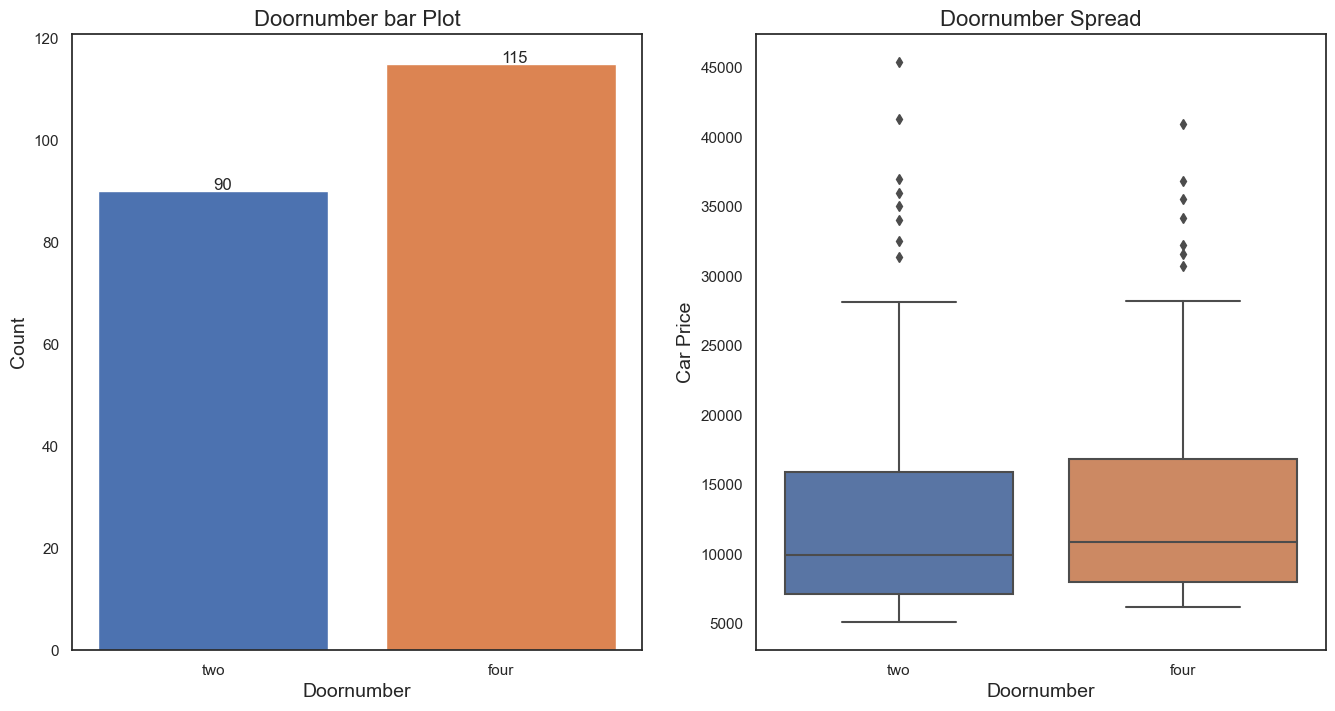

In [196]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Doornumber bar Plot',fontsize = 16)
doornumber_count = cars.doornumber.value_counts().to_dict()
doornumber_count = dict(sorted(doornumber_count.items(), key=lambda x: x[0],reverse=True))
pathcher =plt.bar(list(doornumber_count.keys()),list(doornumber_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Doornumber',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Doornumber Spread',fontsize = 16) 
sns.boxplot(x=cars.doornumber,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Doornumber',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Không có sự ảnh hưởng giữa giá xe và biến doornumber

#### 2.5 aspiration

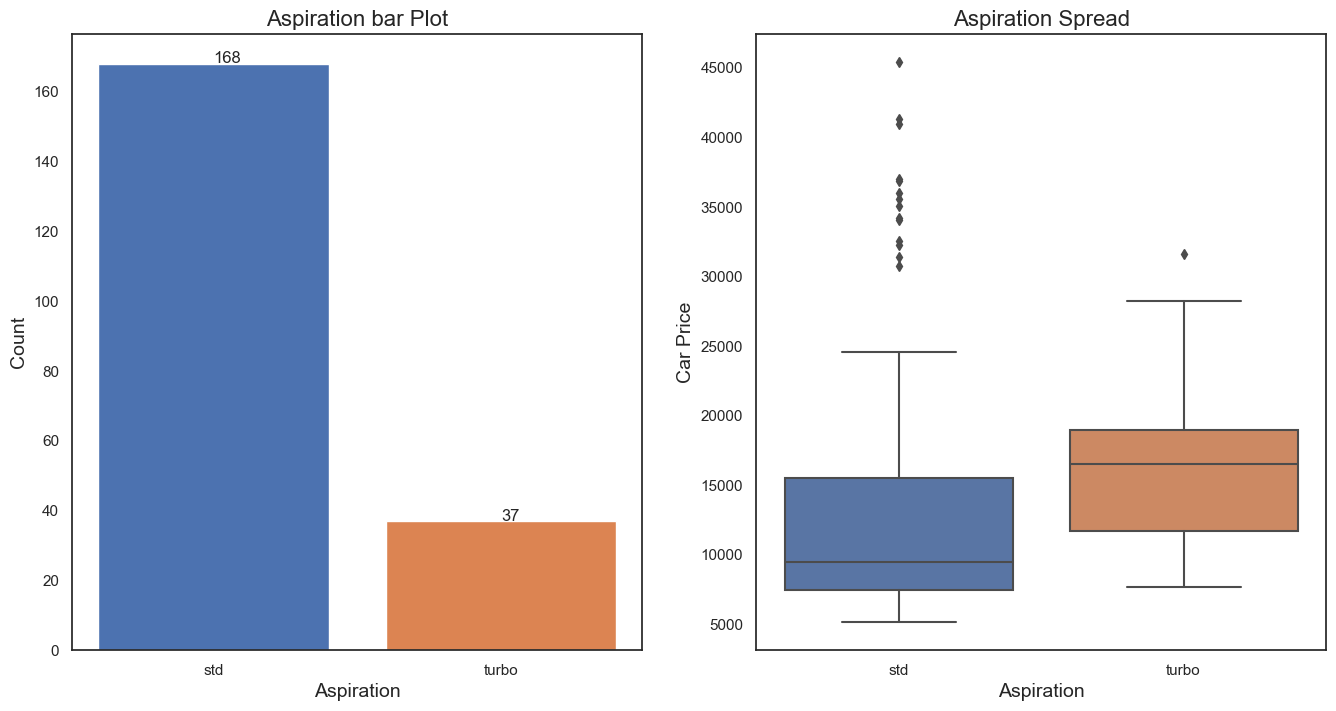

In [197]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Aspiration bar Plot',fontsize = 16)
aspiration_count = cars.aspiration.value_counts().to_dict()
aspiration_count = dict(sorted(aspiration_count.items(), key=lambda x: x[0]))
pathcher =plt.bar(list(aspiration_count.keys()),list(aspiration_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Aspiration',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Aspiration Spread',fontsize = 16) 
sns.boxplot(x=cars.aspiration,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Aspiration',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Loại hút Turbo mặc dù số lượng trên thị trường không nhiều như std nhưng mức giá vẫn có phần nhỉnh hơn.

#### 2.6 cylindernumber

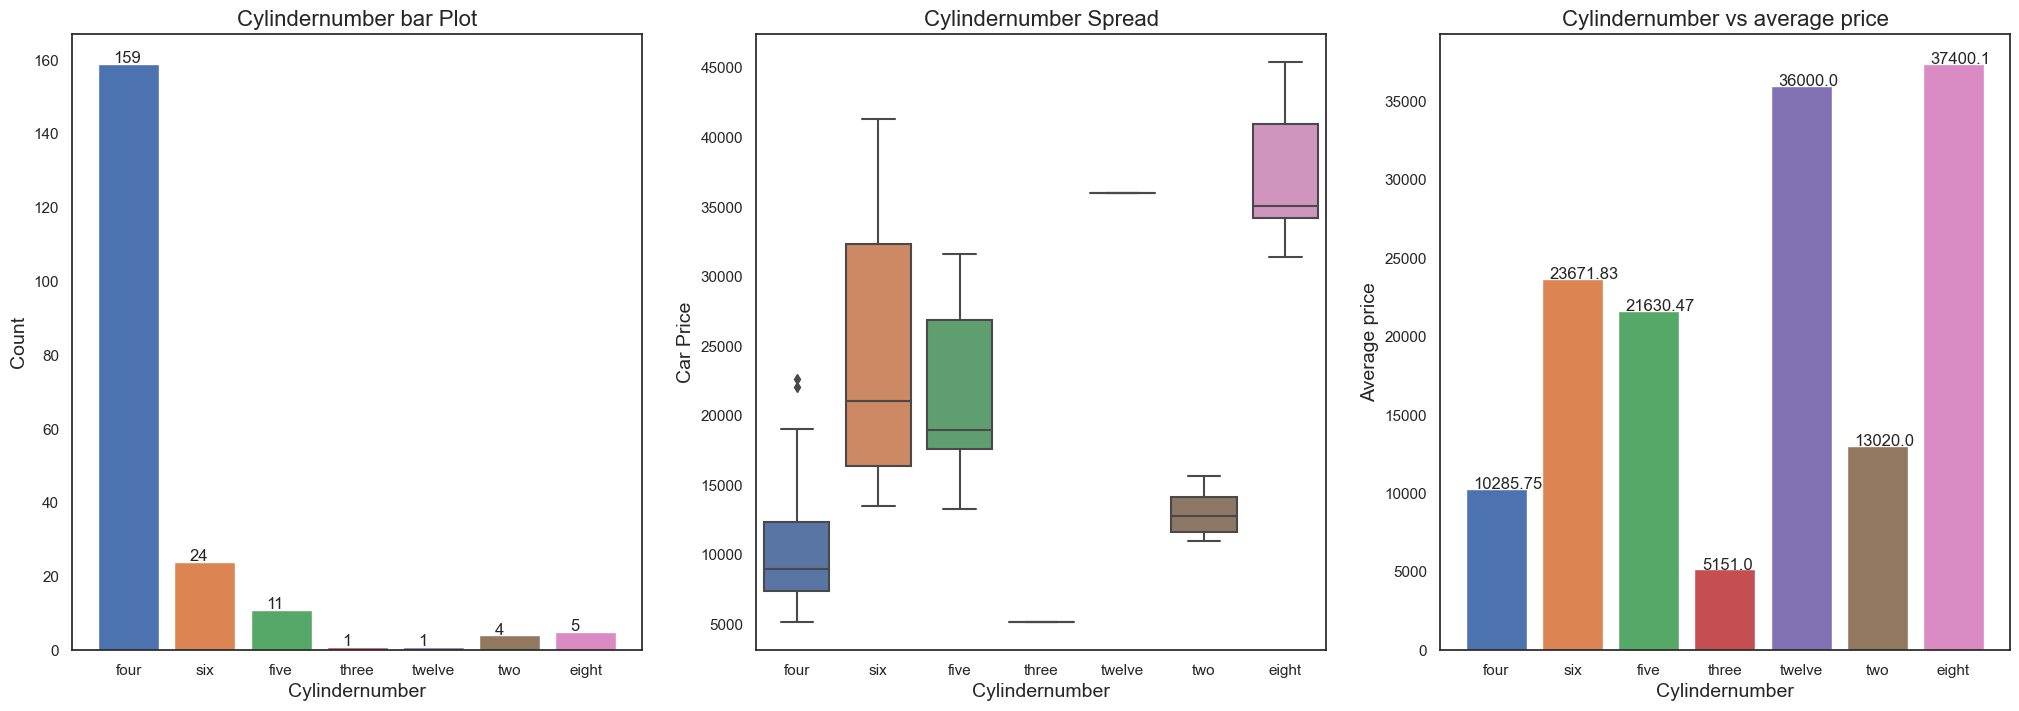

In [198]:
sns.set_theme(style = 'white')

order=list(cars.cylindernumber.unique())

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Cylindernumber bar Plot',fontsize = 16)
cylindernumber_count = cars.cylindernumber.value_counts().to_dict()
cylindernumber_count = dict(sorted(cylindernumber_count.items(), key=lambda x: order.index(x[0])))
pathcher =plt.bar(list(cylindernumber_count.keys()),list(cylindernumber_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2-0.2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Cylindernumber Spread',fontsize = 16) 
sns.boxplot(x=cars.cylindernumber,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
cylindernumber_ser = cars.groupby(['cylindernumber'])['price'].mean().to_dict()
cylindernumber_ser = dict(sorted(cylindernumber_ser.items(), key=lambda x: order.index(x[0])))
pathcher = plt.bar(list(cylindernumber_ser.keys()),list(cylindernumber_ser.values()),color=color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2-0.3, i.get_height()+0.2,
             str(round(i.get_height(),2)),
             fontsize = 12)
plt.title('Cylindernumber vs average price',fontsize = 16)
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)
plt.show()

- Số lượng xi lanh phổ biến là 4,6,5 (theo thứ tự giảm dần) nhưng thấy số lượng xi lanh càng nhiều thì giá càng cao.

#### 2.7 enginelocation

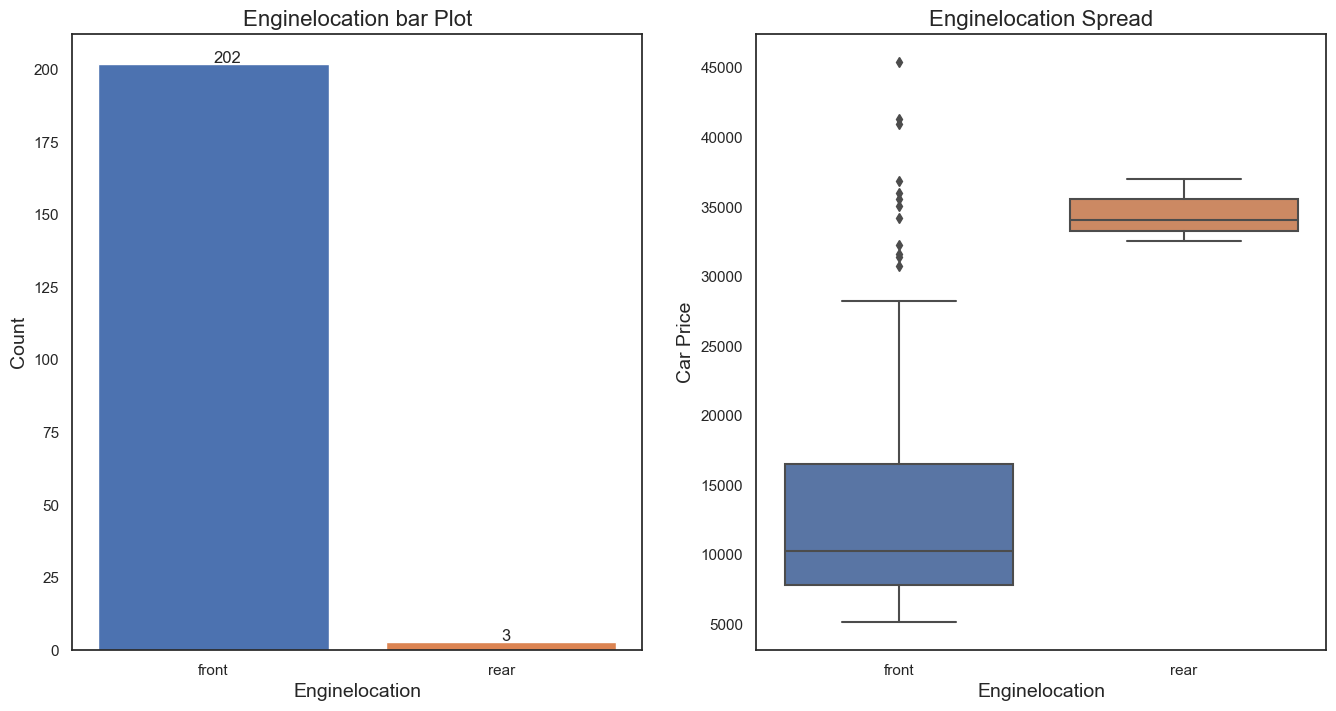

In [199]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Enginelocation bar Plot',fontsize = 16)
enginelocation_count = cars.enginelocation.value_counts().to_dict()
pathcher =plt.bar(list(enginelocation_count.keys()),list(enginelocation_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Enginelocation',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Enginelocation Spread',fontsize = 16) 
sns.boxplot(x=cars.enginelocation,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Enginelocation',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Quá ít dữ liệu về enginelocation để kết luận, nhưng một vài chiều xe bố trí động cơ ở phía sau thì nằm ở mức giá cao

#### 2.8 Fuelsystem

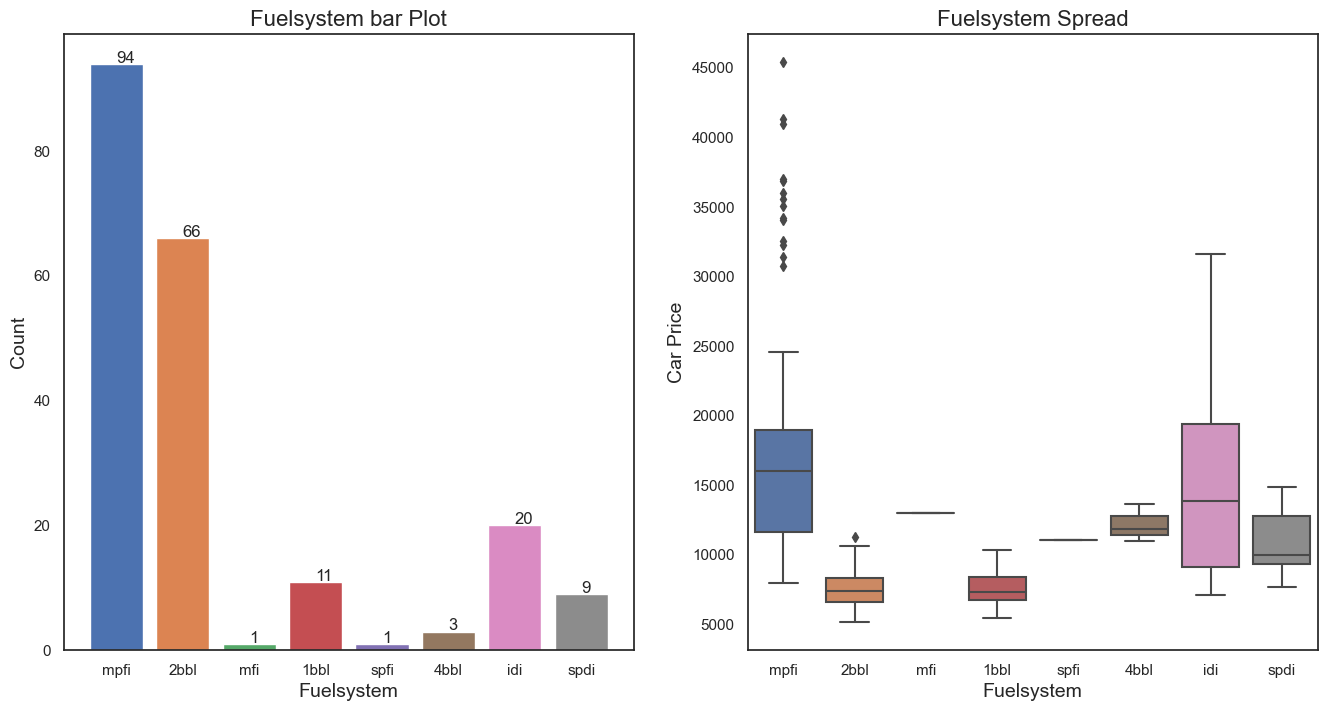

In [200]:
sns.set_theme(style = 'white')

order=list(cars.fuelsystem.unique())

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Fuelsystem bar Plot',fontsize = 16)
fuelsystem_count = cars.fuelsystem.value_counts().to_dict()
fuelsystem_count = dict(sorted(fuelsystem_count.items(), key=lambda x: order.index(x[0])))
pathcher =plt.bar(list(fuelsystem_count.keys()),list(fuelsystem_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Fuelsystem',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Fuelsystem Spread',fontsize = 16) 
sns.boxplot(x=cars.fuelsystem,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Fuelsystem',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Hệ thống nhiên liệu mpfi và 2bbl được ưa chuộng nhất

#### 2.8 drivewheel

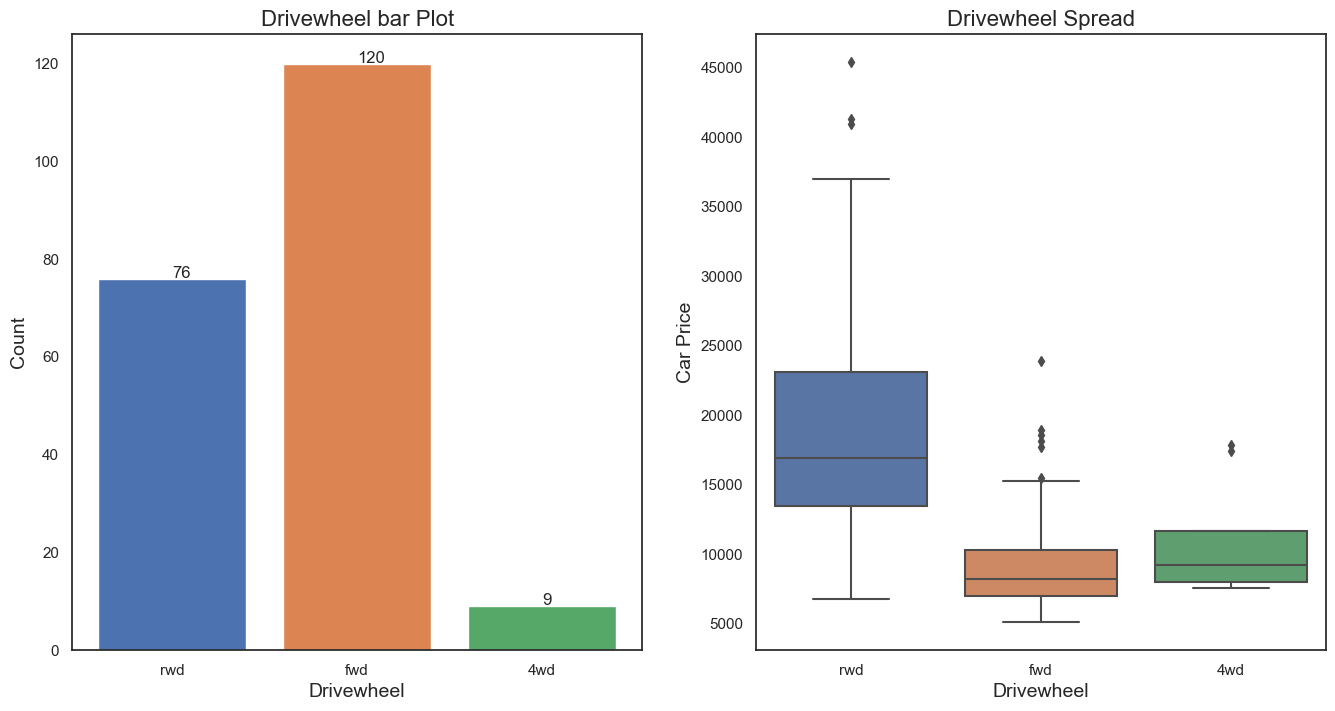

In [201]:
sns.set_theme(style = 'white')

order=list(cars.drivewheel.unique())

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Drivewheel bar Plot',fontsize = 16)
drivewheel_count = cars.drivewheel.value_counts().to_dict()
drivewheel_count = dict(sorted(drivewheel_count.items(), key=lambda x: order.index(x[0])))
pathcher =plt.bar(list(drivewheel_count.keys()),list(drivewheel_count.values()),color = color_sns)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Drivewheel',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Drivewheel Spread',fontsize = 16) 
sns.boxplot(x=cars.drivewheel,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Drivewheel',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

Hầu hết các chiếc xe có mức giá từ tầm trung trở lên đều sử dụng loại bánh xe rwd

### 3 Các thuộc tính định lượng

#### 3.1 Các thông số về kích thước xe (carlenght, carwidth, carheight, curbweight):

In [202]:
def scatter(property,fig):
    plt.subplot(2,2,fig)
    plt.scatter(cars[property],cars['price'])
    # df = cars[[property,'price']]
    # sns.lmplot(x=property,y='price',data=df)
    plt.title(property + ' vs Price',fontsize = 16)
    plt.xlabel(property,fontsize=14)
    plt.ylabel('Price',fontsize=14)


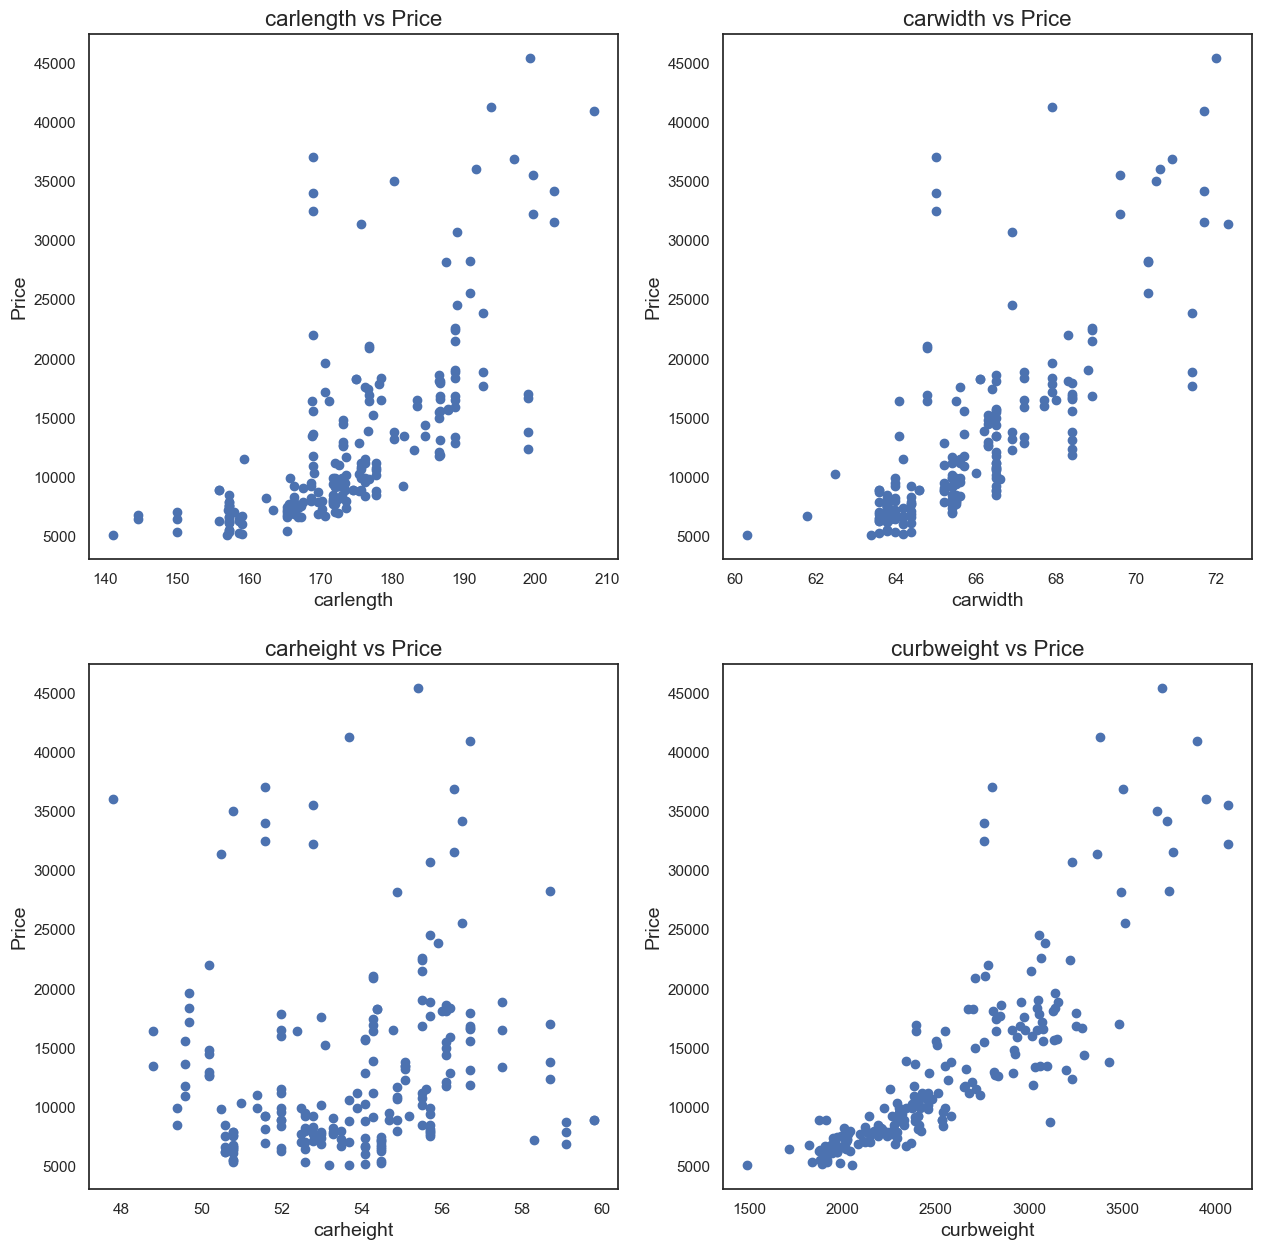

In [203]:
plt.figure(figsize=(15,15))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.show()

- carlenght, carwidth, curbweight có mối tương quan với giá xe

- carheight không thể hiện tương quan với giá xe


In [204]:
def pearsonr2property(p1,p2):
    print(p1,p2,sep='\t')
    r, pvalue = pearsonr(cars[p1], cars[p2])
    print ('r =', r)
    print ('pvalue =',pvalue)
    if pvalue > 0.05:
        print(f'2 thuộc tính {p1} và {p2} không tương quan với nhau')
    else:
        if r > 0:
            print(f'2 thuộc tính {p1} và {p2} tương quan thuận với nhau')
        elif r < 0:
            print(f'2 thuộc tính {p1} và {p2} tương quan nghịch với nhau')
        else:
            print(f'2 thuộc tính {p1} và {p2} không tương quan với nhau')
    print()

In [205]:
pearsonr2property('carlength','price')
pearsonr2property('carwidth','price')
pearsonr2property('carheight','price')
pearsonr2property('curbweight','price')

carlength	price
r = 0.682920015677962
pvalue = 1.6787066240748032e-29
2 thuộc tính carlength và price tương quan thuận với nhau

carwidth	price
r = 0.7593252997415115
pvalue = 9.627437876119843e-40
2 thuộc tính carwidth và price tương quan thuận với nhau

carheight	price
r = 0.11933622657049447
pvalue = 0.08832832352275669
2 thuộc tính carheight và price không tương quan với nhau

curbweight	price
r = 0.8353048793372968
pvalue = 1.214444826403117e-54
2 thuộc tính curbweight và price tương quan thuận với nhau



In [206]:
pearsonr2property('carlength','carwidth')
pearsonr2property('carlength','carheight')

carlength	carwidth
r = 0.8411182684818449
pvalue = 4.332386050436918e-56
2 thuộc tính carlength và carwidth tương quan thuận với nhau

carlength	carheight
r = 0.4910294575042144
pvalue = 7.73166602674426e-14
2 thuộc tính carlength và carheight tương quan thuận với nhau



#### 3.2 Các thuộc tính khác (enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, wheelbase, citympg, highwaympg) :

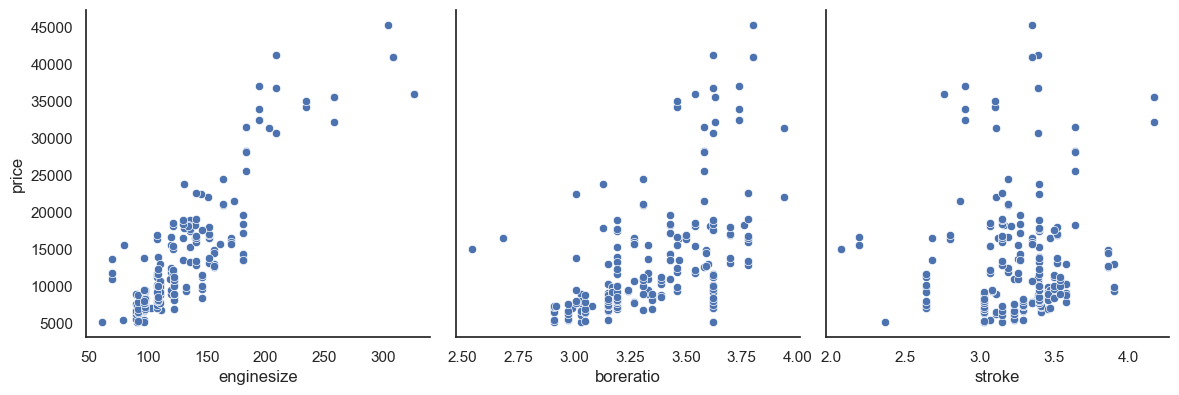

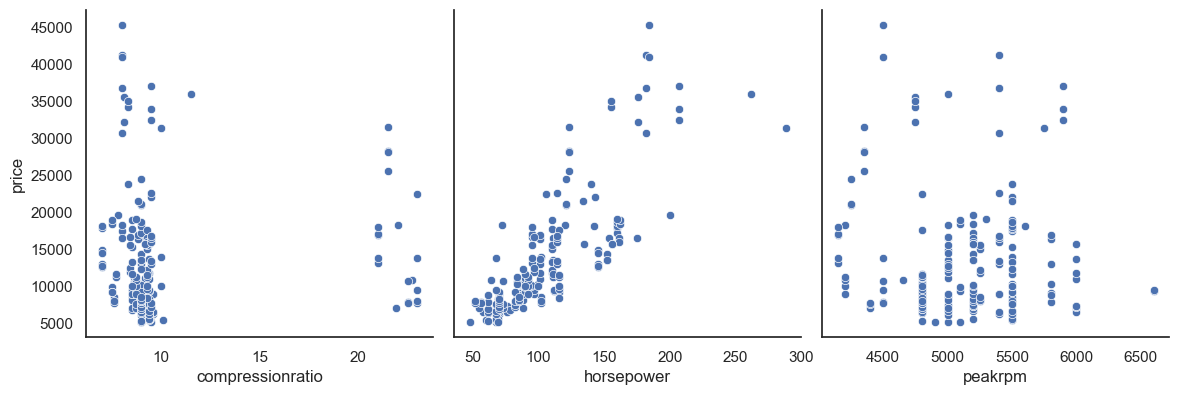

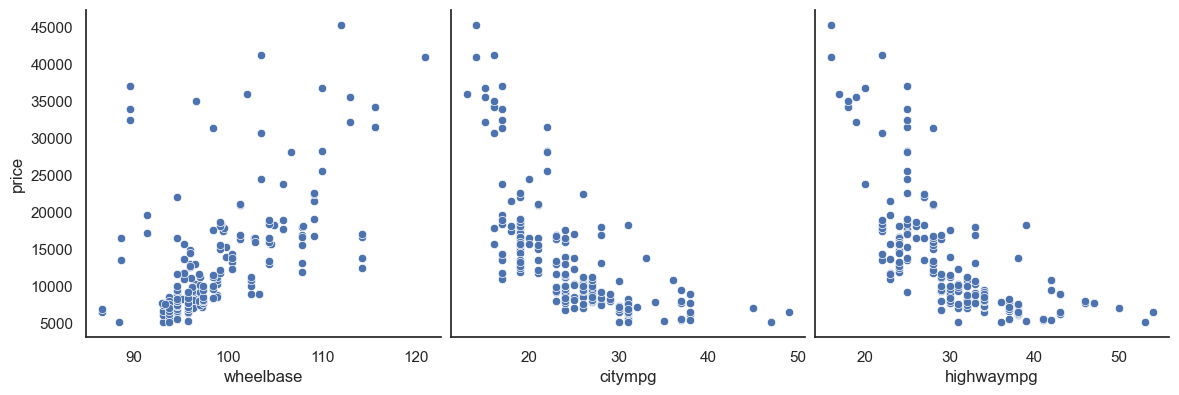

In [207]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [208]:
properties = ['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg']
for property in properties:
    pearsonr2property(property,'price')

enginesize	price
r = 0.8741448025245117
pvalue = 1.3547637598648423e-65
2 thuộc tính enginesize và price tương quan thuận với nhau

boreratio	price
r = 0.5531732367984437
pvalue = 7.907922278249421e-18
2 thuộc tính boreratio và price tương quan thuận với nhau

stroke	price
r = 0.079443083881931
pvalue = 0.25751371590910366
2 thuộc tính stroke và price không tương quan với nhau

compressionratio	price
r = 0.06798350579944261
pvalue = 0.3327723612238313
2 thuộc tính compressionratio và price không tương quan với nhau

horsepower	price
r = 0.8081388225362216
pvalue = 1.4834365732941758e-48
2 thuộc tính horsepower và price tương quan thuận với nhau

peakrpm	price
r = -0.08526715027785686
pvalue = 0.22414123444667844
2 thuộc tính peakrpm và price không tương quan với nhau

wheelbase	price
r = 0.5778155982921502
pvalue = 1.1828204863377837e-19
2 thuộc tính wheelbase và price tương quan thuận với nhau

citympg	price
r = -0.68575133602704
pvalue = 7.978684249663408e-30
2 thuộc tính citympg và 

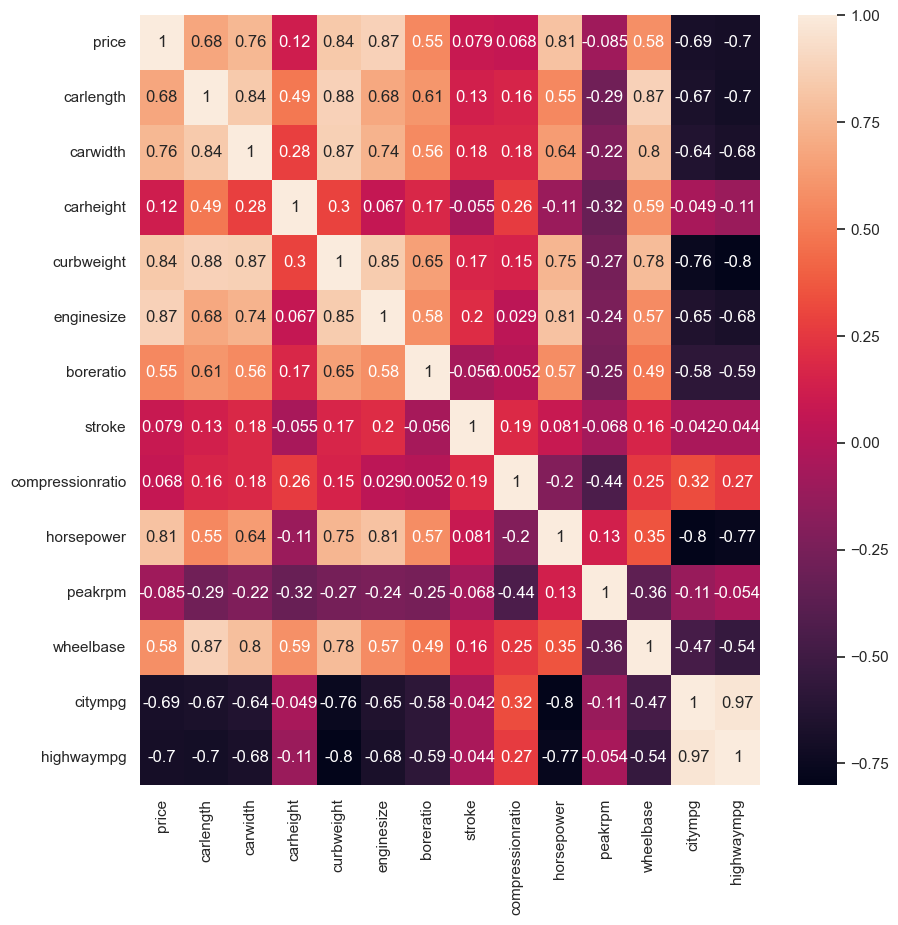

In [209]:
column=['price','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg']
cars_cor = cars[column].corr()

plt.figure(figsize=(10,10))
sns.heatmap(cars_cor, annot=True)
plt.show()

In [210]:
cars_cor.head()

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,wheelbase,citympg,highwaympg
price,1.000000,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,0.577816,-0.685751,-0.697599
carlength,0.682920,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.874587,-0.670909,-0.704662
carwidth,0.759325,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.795144,-0.642704,-0.677218
carheight,0.119336,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.589435,-0.048640,-0.107358
curbweight,0.835305,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.776386,-0.757414,-0.797465


In [211]:
cars_cor['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Các thuộc tính carheight: 0.119, stroke 0.07, compressionration : 0.067, peakrpm :- 0.085 các hệ  số Correlation ~ 0 nên loại bỏ.

### 4 Danh sách các tham số quan trọng:


- EngineType 
- Fueltype 
- CarBody 
- Aspiration 
- CylinderNumber 
- Drivewheel
- fuelsystem
- Curbweight -
- CarLength -
- Carwidth -
- EngineSize -
- Boreratio -
- HorsePower -
- Wheelbase -
- citympg -
- highwaympg -

In [212]:
cars_sub = cars[['price','brand', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                'carlength','carwidth','citympg','highwaympg','fuelsystem']]
cars_sub.head()

,price,brand,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,fuelsystem
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,21,27,mpfi
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,21,27,mpfi
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26,mpfi
3,13950.0,audi,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,24,30,mpfi
4,17450.0,audi,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,18,22,mpfi


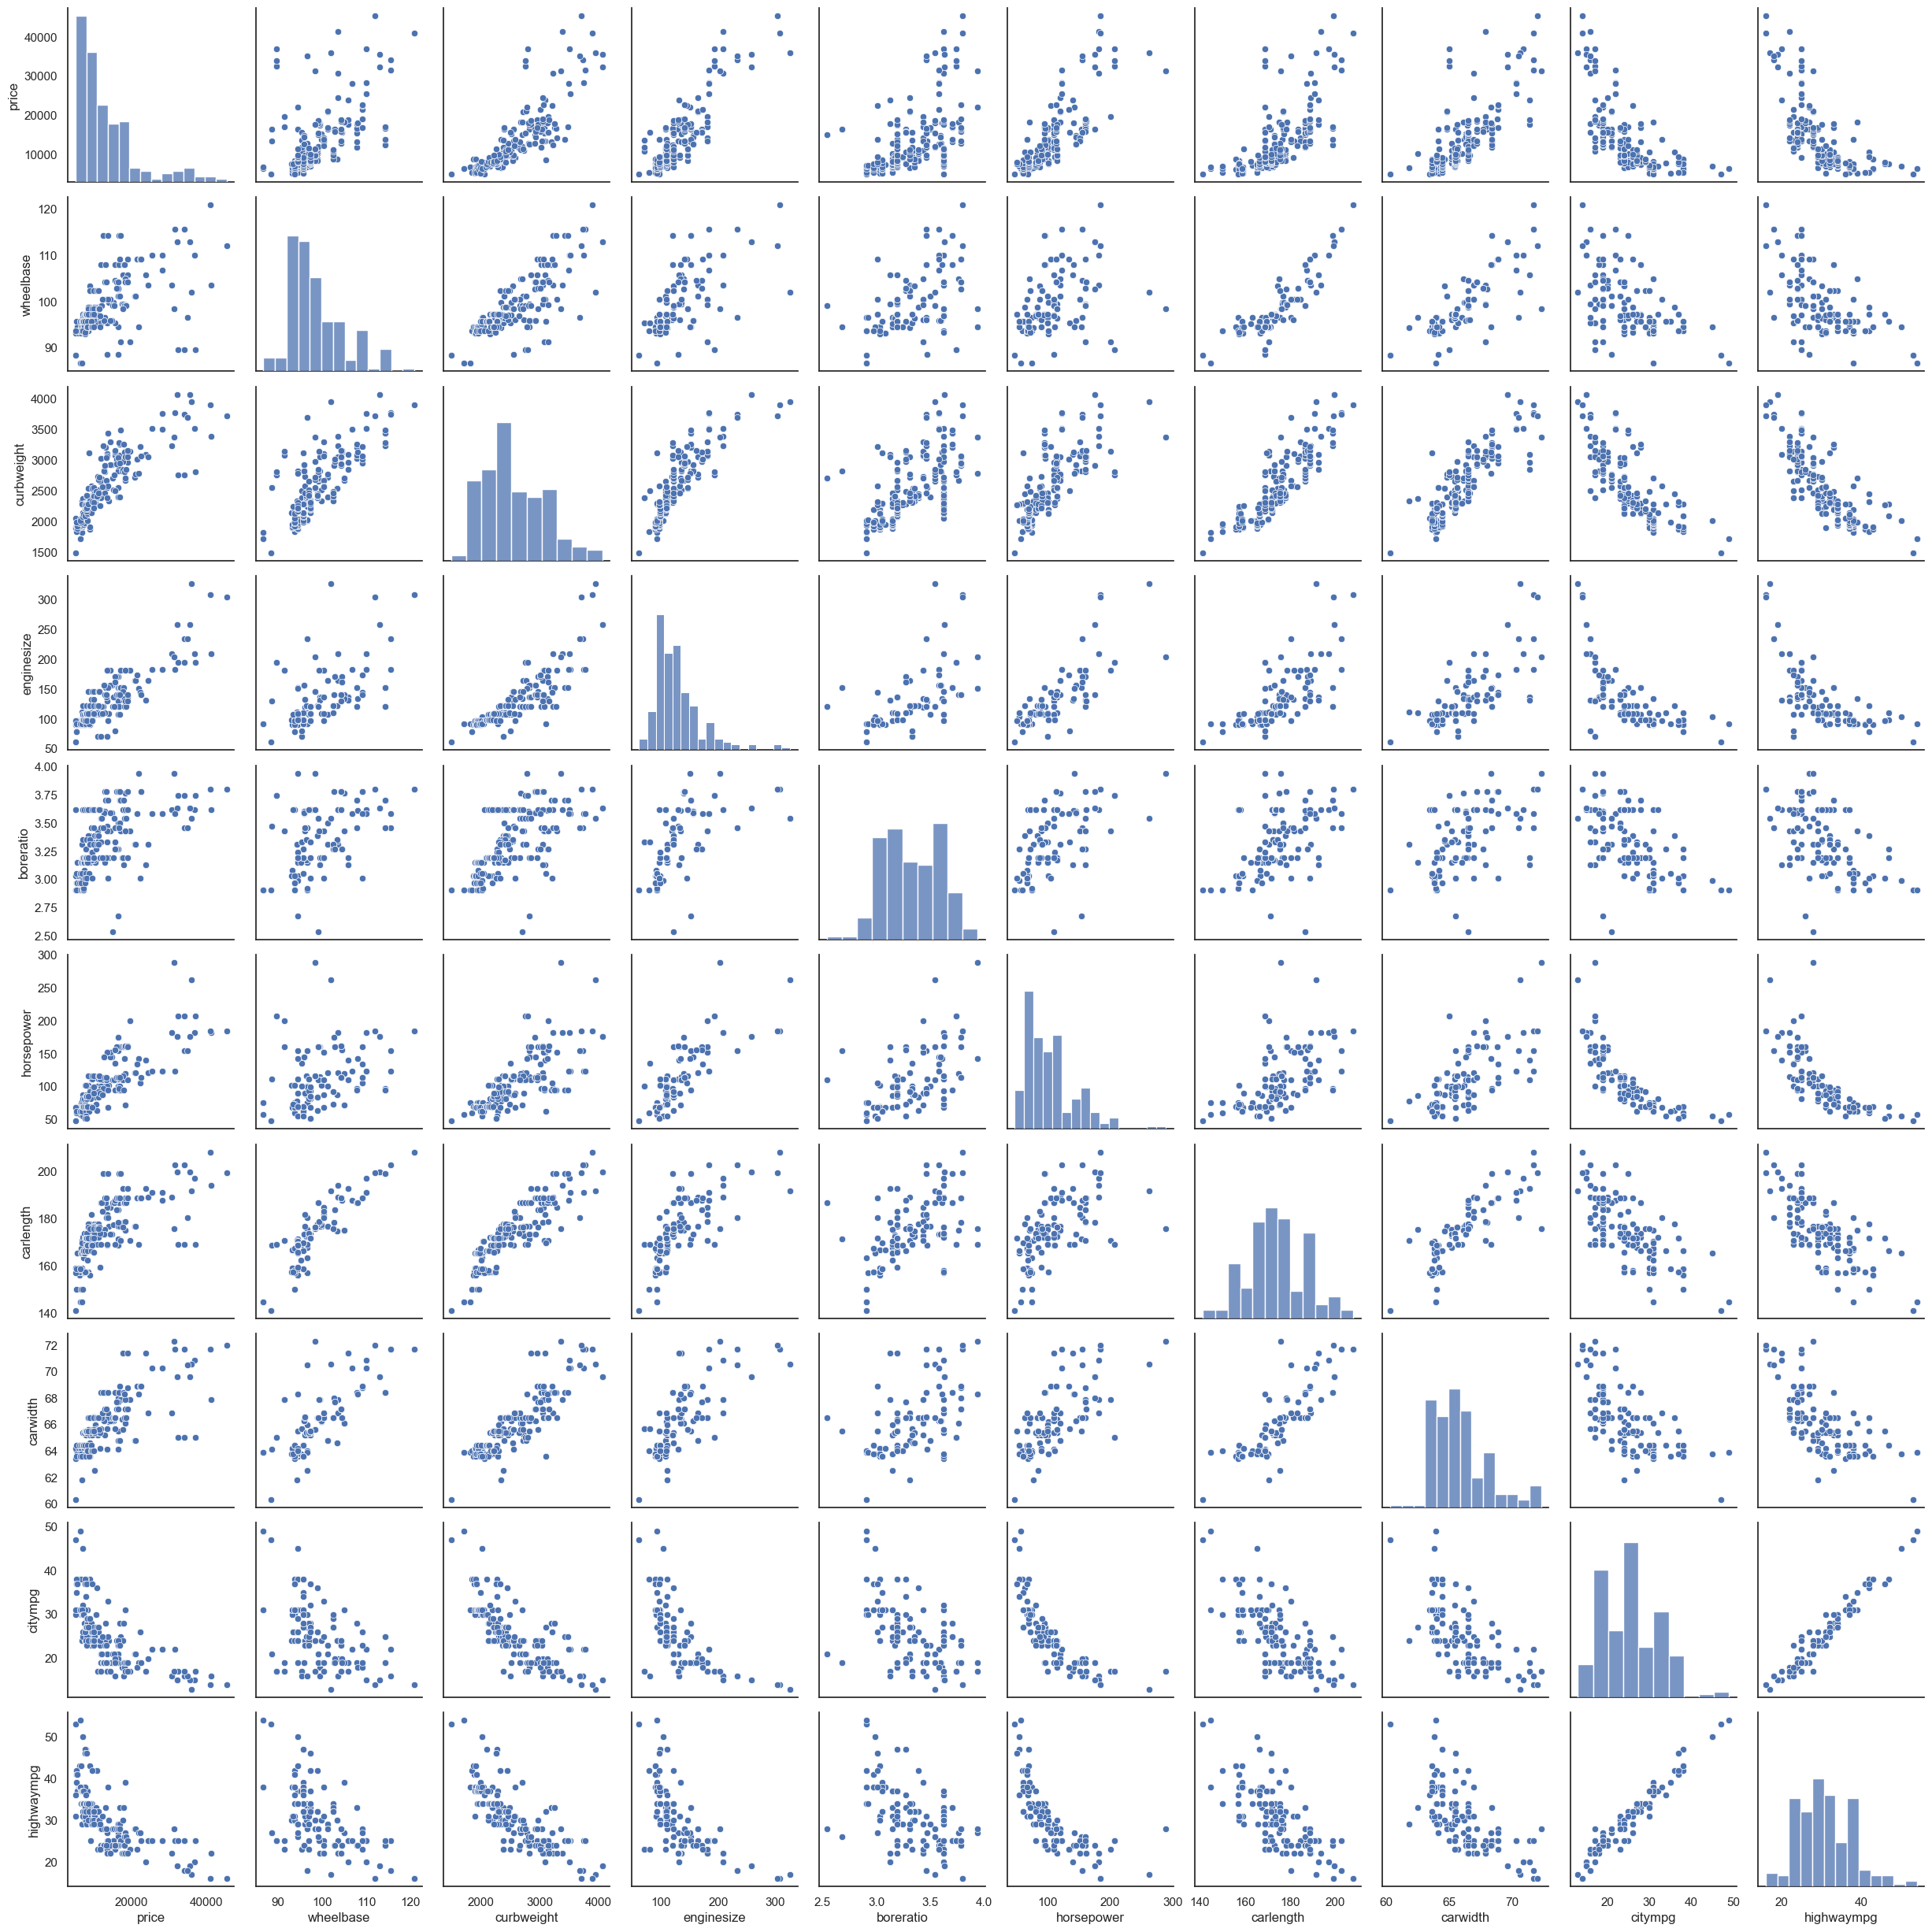

In [213]:
sns.pairplot(cars_sub)
plt.show()

In [214]:
def CreateDummies(property2dum,df,drop_first_bool=False):
    dummies = pd.get_dummies(df[property2dum],prefix=property2dum,drop_first = drop_first_bool)
    df = pd.concat([df, dummies], axis=1)
    df.drop([property2dum],axis=1,inplace=True)
    return df

In [215]:
cars_sub = CreateDummies('brand',cars_sub,True)
cars_sub = CreateDummies('fueltype',cars_sub,True)
cars_sub = CreateDummies('aspiration',cars_sub,True)
cars_sub = CreateDummies('carbody',cars_sub,True)
cars_sub = CreateDummies('drivewheel',cars_sub,True)
cars_sub = CreateDummies('enginetype',cars_sub,True)
cars_sub = CreateDummies('cylindernumber',cars_sub,True)
cars_sub = CreateDummies('fuelsystem',cars_sub,True)

In [216]:
cars_sub.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [217]:
corr_carssub = cars_sub.corr()
corr_carssub['price'].sort_values(ascending = False).round(2)

price                    1.00
enginesize               0.87
curbweight               0.84
horsepower               0.81
carwidth                 0.76
carlength                0.68
drivewheel_rwd           0.64
wheelbase                0.58
boreratio                0.55
fuelsystem_mpfi          0.52
brand_buick              0.52
cylindernumber_six       0.47
enginetype_ohcv          0.39
brand_porsche            0.36
brand_jaguar             0.33
brand_bmw                0.32
cylindernumber_five      0.25
carbody_hardtop          0.23
cylindernumber_twelve    0.20
aspiration_turbo         0.18
enginetype_dohcv         0.16
brand_volvo              0.14
carbody_sedan            0.13
brand_audi               0.11
fuelsystem_idi           0.11
brand_peugeot            0.07
brand_saab               0.04
enginetype_l             0.04
brand_mercury            0.03
enginetype_ohcf          0.02
fuelsystem_mfi          -0.00
enginetype_rotor        -0.00
cylindernumber_two      -0.00
fuelsystem

In [218]:
from sklearn.model_selection import train_test_split
cars_df_train, cars_df_test = train_test_split(cars_sub,train_size = 0.8, test_size = 0.2,random_state = 0)
cars_df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
71,34184.0,115.6,3740,234,3.46,155,202.6,71.7,16,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
134,15040.0,99.1,2707,121,2.54,110,186.6,66.5,21,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
145,11259.0,97.0,2510,108,3.62,111,172.0,65.4,24,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
122,7609.0,93.7,2191,98,2.97,68,167.3,63.8,31,38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['price','wheelbase','curbweight','enginesize','boreratio','horsepower','carlength','carwidth','citympg','highwaympg']
cars_df_train[features] = scaler.fit_transform(cars_df_train[features])

In [220]:
cars_df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
4,0.342653,0.373178,0.472163,0.257812,0.515873,0.300000,0.503937,0.464646,0.138889,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
71,0.810541,0.845481,0.861453,0.640625,0.730159,0.490476,0.913386,1.000000,0.083333,0.052632,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
134,0.275269,0.364431,0.422439,0.199219,0.000000,0.276190,0.661417,0.474747,0.222222,0.315789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
145,0.169551,0.303207,0.338717,0.148438,0.857143,0.280952,0.431496,0.363636,0.305556,0.342105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
122,0.067496,0.206997,0.203145,0.109375,0.341270,0.076190,0.357480,0.202020,0.500000,0.578947,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [221]:
cars_df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.226752,0.358778,0.366753,0.223847,0.631243,0.248374,0.471404,0.416174,0.337229,0.382542,0.030488,0.036585,0.042683,0.012195,0.048780,0.067073,0.012195,0.018293,0.085366,0.006098,0.067073,0.091463,0.054878,0.042683,0.018293,0.0,0.030488,0.067073,0.134146,0.048780,0.067073,0.884146,0.213415,0.036585,0.310976,0.506098,0.115854,0.579268,0.371951,0.0,0.054878,0.719512,0.085366,0.067073,0.018293,0.054878,0.786585,0.115854,0.0,0.006098,0.018293,0.323171,0.012195,0.115854,0.006098,0.432927,0.048780,0.006098
std,0.217297,0.180212,0.222075,0.160825,0.216382,0.180986,0.191010,0.210363,0.178698,0.180315,0.172452,0.188317,0.202760,0.110092,0.216069,0.250915,0.110092,0.134418,0.280281,0.078087,0.250915,0.289150,0.228440,0.202760,0.134418,0.0,0.172452,0.250915,0.341853,0.216069,0.250915,0.321030,0.410973,0.188317,0.464311,0.501494,0.321030,0.495189,0.484806,0.0,0.228440,0.450613,0.280281,0.250915,0.134418,0.228440,0.410973,0.321030,0.0,0.078087,0.134418,0.469120,0.110092,0.321030,0.078087,0.496998,0.216069,0.078087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.072410,0.230321,0.203039,0.109375,0.484127,0.085714,0.357480,0.229798,0.166667,0.236842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.147491,0.303207,0.299193,0.195312,0.626984,0.209524,0.450394,0.368687,0.305556,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

#### 4.1 Tạo model từ dữ liệu train

In [222]:
columncount = len(cars_df_train.columns)
columncount

58

In [223]:
cars_df_train.iloc[:,1:]

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
4,0.373178,0.472163,0.257812,0.515873,0.300000,0.503937,0.464646,0.138889,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
71,0.845481,0.861453,0.640625,0.730159,0.490476,0.913386,1.000000,0.083333,0.052632,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
134,0.364431,0.422439,0.199219,0.000000,0.276190,0.661417,0.474747,0.222222,0.315789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
145,0.303207,0.338717,0.148438,0.857143,0.280952,0.431496,0.363636,0.305556,0.342105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
122,0.206997,0.203145,0.109375,0.341270,0.076190,0.357480,0.202020,0.500000,0.578947,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.682216,0.765831,0.441406,0.825397,0.338095,0.729134,0.858586,0.250000,0.236842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
192,0.402332,0.368041,0.105469,0.373016,0.076190,0.560630,0.515152,0.555556,0.578947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
117,0.623907,0.602210,0.250000,0.849206,0.428571,0.662992,0.656566,0.138889,0.210526,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
47,0.769679,1.000000,0.734375,0.865079,0.590476,0.866142,0.787879,0.055556,0.078947,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [224]:
X = cars_df_train.iloc[:,1:]

In [225]:
y = cars_df_train.iloc[:,0]

In [226]:
model1 = LinearRegression() 
model1.fit(X,y.ravel())

LinearRegression()

#### 4.2 Tạo Model từ các biến được chọn (các thuộc tính tốt nhất)

In [227]:
##Test
from sklearn.metrics import r2_score
features_count= 1
old_rsquared = 0
old_pvlcount = columncount
cars_df_test[features] = scaler.fit_transform(cars_df_test[features])
cars_df_test[features].head()

Y_Test = cars_df_test.iloc[:,0]
for i in range(1,columncount):
    rfe = RFE(model1, n_features_to_select=i)
    rfe = rfe.fit(X, y)
    supportcolumns = X.columns[rfe.support_]
    cars_df_train_support = cars_df_train[supportcolumns]
    cars_df_train_support = sm.add_constant(cars_df_train_support)
    model2 = sm.OLS(y, cars_df_train_support).fit()

    count = 0
    for i in range(1,len(model2.pvalues)):
        pv = model2.pvalues[i]
        if pv > 0.05: count += 1
    print(f'số thuộc tính {i} ',f'rsquared: {round(model2.rsquared,2)}',f'Số pvalue > 0.05: {count}',sep='\t')

    if model2.rsquared >= old_rsquared and count <= old_pvlcount:
        old_pvlcount = count
        old_rsquared = model2.rsquared
        features_count = i
    
    X_test2 = cars_df_test[supportcolumns]
    X_test2 = sm.add_constant(X_test2)
    Y_prediction_model2 = model2.predict(X_test2)
    
    score=r2_score(Y_Test,Y_prediction_model2)
    print('R-square bộ test:',round(score,2))
    print()
print(features_count)

số thuộc tính 1 	rsquared: 0.66	Số pvalue > 0.05: 0
R-square bộ test: 0.62

số thuộc tính 2 	rsquared: 0.78	Số pvalue > 0.05: 0
R-square bộ test: 0.65

số thuộc tính 3 	rsquared: 0.83	Số pvalue > 0.05: 0
R-square bộ test: 0.37

số thuộc tính 4 	rsquared: 0.86	Số pvalue > 0.05: 0
R-square bộ test: 0.53

số thuộc tính 5 	rsquared: 0.88	Số pvalue > 0.05: 0
R-square bộ test: 0.54

số thuộc tính 6 	rsquared: 0.93	Số pvalue > 0.05: 0
R-square bộ test: 0.64

số thuộc tính 7 	rsquared: 0.94	Số pvalue > 0.05: 0
R-square bộ test: 0.64

số thuộc tính 8 	rsquared: 0.94	Số pvalue > 0.05: 1
R-square bộ test: 0.64

số thuộc tính 9 	rsquared: 0.94	Số pvalue > 0.05: 0
R-square bộ test: 0.76

số thuộc tính 10 	rsquared: 0.94	Số pvalue > 0.05: 0
R-square bộ test: 0.74

số thuộc tính 11 	rsquared: 0.94	Số pvalue > 0.05: 0
R-square bộ test: 0.74

số thuộc tính 12 	rsquared: 0.95	Số pvalue > 0.05: 0
R-square bộ test: 0.77

số thuộc tính 13 	rsquared: 0.95	Số pvalue > 0.05: 0
R-square bộ test: 0.78

số thuộc

Thấy số lượng thuộc tính là 10 và 15(code tự chọn) cho mô hình khá tốt

In [228]:
rfe = RFE(model1, n_features_to_select=features_count)
rfe = rfe.fit(X, y)

In [229]:
supportcolumns = X.columns[rfe.support_]
supportcolumns

Index(['wheelbase', 'curbweight', 'horsepower', 'carwidth', 'brand_bmw', 'brand_buick', 'brand_jaguar', 'brand_porsche', 'brand_subaru', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_ohcf', 'cylindernumber_four'], dtype='object')

In [230]:
cars_df_train_support = cars_df_train[supportcolumns]
cars_df_train_support.head()

,wheelbase,curbweight,horsepower,carwidth,brand_bmw,brand_buick,brand_jaguar,brand_porsche,brand_subaru,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_ohcf,cylindernumber_four
4,0.373178,0.472163,0.300000,0.464646,0,0,0,0,0,0,0,1,0,0,0
71,0.845481,0.861453,0.490476,1.000000,0,1,0,0,0,0,0,1,0,0,0
134,0.364431,0.422439,0.276190,0.474747,0,0,0,0,0,0,1,0,0,0,1
145,0.303207,0.338717,0.280952,0.363636,0,0,0,0,1,0,0,1,0,1,1
122,0.206997,0.203145,0.076190,0.202020,0,0,0,0,0,0,0,1,0,0,1


In [231]:
cars_df_train_support = sm.add_constant(cars_df_train_support)
model2 = sm.OLS(y, cars_df_train_support).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.70e-91
Time:                        15:48:03   Log-Likelihood:                 269.40
No. Observations:                 164   AIC:                            -508.8
Df Residuals:                     149   BIC:                            -462.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1083    

#### 4.3 Tạo mô hình Model3 từ 10 thuộc tính tốt nhất

In [232]:
rfe = RFE(model1, n_features_to_select=10)
rfe = rfe.fit(X, y)

In [233]:
supportcolumns_model3 = X.columns[rfe.support_]
supportcolumns_model3

Index(['curbweight', 'horsepower', 'carwidth', 'brand_bmw', 'brand_buick', 'brand_jaguar', 'brand_porsche', 'brand_subaru', 'carbody_hardtop', 'enginetype_ohcf'], dtype='object')

In [234]:
cars_df_train_support3 = cars_df_train[supportcolumns_model3]
cars_df_train_support3.head()

,curbweight,horsepower,carwidth,brand_bmw,brand_buick,brand_jaguar,brand_porsche,brand_subaru,carbody_hardtop,enginetype_ohcf
4,0.472163,0.300000,0.464646,0,0,0,0,0,0,0
71,0.861453,0.490476,1.000000,0,1,0,0,0,0,0
134,0.422439,0.276190,0.474747,0,0,0,0,0,0,0
145,0.338717,0.280952,0.363636,0,0,0,0,1,0,1
122,0.203145,0.076190,0.202020,0,0,0,0,0,0,0


In [235]:
cars_df_train_support3 = sm.add_constant(cars_df_train_support3)
model3 = sm.OLS(y, cars_df_train_support3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     277.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.42e-90
Time:                        15:48:03   Log-Likelihood:                 251.35
No. Observations:                 164   AIC:                            -482.7
Df Residuals:                     154   BIC:                            -451.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0641      0.011     

#### 4.4 Test Model

In [236]:
cars_df_test[features] = scaler.fit_transform(cars_df_test[features])
cars_df_test[features].head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
52,0.041631,0.182171,0.187247,0.123457,0.116505,0.083333,0.309811,0.325000,0.515152,0.594595
181,0.263939,0.624031,0.746744,0.411523,0.349515,0.450000,0.803787,0.516667,0.151515,0.216216
5,0.251527,0.441860,0.457566,0.308642,0.271845,0.258333,0.623064,0.500000,0.151515,0.243243
18,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
188,0.121071,0.344961,0.364616,0.197531,0.271845,0.216667,0.526678,0.433333,0.363636,0.432432


##### Test mô hình 1:

In [237]:
X_test= cars_df_test.iloc[:,1:].values.reshape(-1,columncount-1)

In [238]:
Y_Test = cars_df_test.iloc[:,0]

In [239]:
Y_prediction_model1 = model1.predict(X_test)

C:\Users\Admin-s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [240]:
#Mean Squared Error (MSE)
mse_model1 = ((Y_Test - Y_prediction_model1) ** 2).mean()
mse_model1

0.01677577610513681

In [241]:
#Root Mean Squared Error (RMSE)
rmse_model1 = np.sqrt(mse_model1)
rmse_model1

0.12952133455588238

##### Test mô hình 2

In [242]:
X_test2 = cars_df_test[supportcolumns]
X_test2 = sm.add_constant(X_test2)

In [243]:
Y_prediction_model2 = model2.predict(X_test2)

In [244]:
mse_model2 = ((Y_Test - Y_prediction_model2) ** 2).mean()
mse_model2

0.00906657096751043

In [245]:
rmse_model2 = np.sqrt(mse_model2)
rmse_model2

0.09521854319149411

Test mô hình 3

In [246]:
X_test3 = cars_df_test[supportcolumns_model3]
X_test3 = sm.add_constant(X_test3)

In [247]:
Y_prediction_model3 = model3.predict(X_test3)

In [248]:
mse_model3 = ((Y_Test - Y_prediction_model3) ** 2).mean()
mse_model3

0.012299977231591524

In [249]:
rmse_model3 = np.sqrt(mse_model3)
rmse_model3

0.11090526241613391

### 5 Đánh giá mô hình

In [250]:
print(f'Model 1 ',f'R-Squared: {round(model1.score(X_test,Y_Test),2)} ',f'RMSE: {round(rmse_model1,2)}', sep='\t')
print(f'Model 2 ',f'R-Squared: {round(r2_score(Y_Test,Y_prediction_model2),2)} ',f'RMSE: {round(rmse_model2,2)}', sep='\t')
print(f'Model 3 ',f'R-Squared: {round(r2_score(Y_Test,Y_prediction_model3),2)} ',f'RMSE: {round(rmse_model3,2)}', sep='\t')

Model 1 	R-Squared: 0.65 	RMSE: 0.13
Model 2 	R-Squared: 0.81 	RMSE: 0.1
Model 3 	R-Squared: 0.74 	RMSE: 0.11


C:\Users\Admin-s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


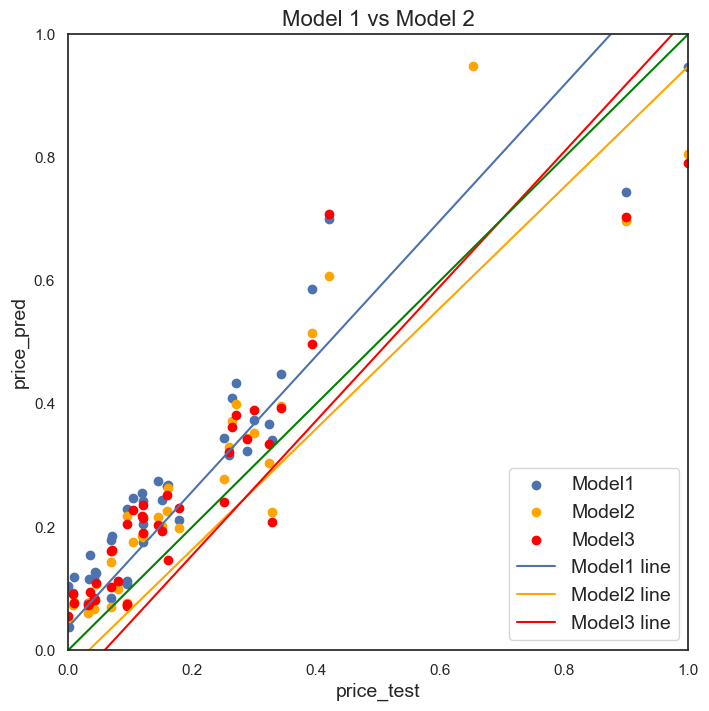

In [260]:
sns.set_theme(style = 'white')
plt.figure(figsize=(8,8))

plt.scatter(Y_Test, Y_prediction_model1,label='Model1')
plt.scatter(Y_Test, Y_prediction_model2,color='orange',label='Model2')
plt.scatter(Y_Test, Y_prediction_model3,color='red',label='Model3')
plt.plot([min(Y_Test),max(Y_Test)],[min(Y_prediction_model1),max(Y_prediction_model1)],label='Model1 line')
plt.plot([min(Y_Test),max(Y_Test)],[min(Y_prediction_model2),max(Y_prediction_model2)],color = 'orange',label='Model2 line')
plt.plot([min(Y_Test),max(Y_Test)],[min(Y_prediction_model3),max(Y_prediction_model3)],color = 'red',label='Model3 line')
plt.plot([0,1],[0,1],color = 'green')
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Model 1 vs Model 2', fontsize = 16)
plt.xlabel('price_test', fontsize = 14)
plt.ylabel('price_pred', fontsize = 14)
plt.legend(fontsize = 14,loc = 'lower right')

plt.show()

In [252]:
model2.pvalues.round(5)

const                  0.00136
wheelbase              0.04028
curbweight             0.01013
horsepower             0.00000
carwidth               0.00005
brand_bmw              0.00000
brand_buick            0.00000
brand_jaguar           0.00000
brand_porsche          0.00000
brand_subaru           0.00000
carbody_hardtop        0.00000
carbody_hatchback      0.00000
carbody_sedan          0.00001
carbody_wagon          0.00000
enginetype_ohcf        0.00000
cylindernumber_four    0.00406
dtype: float64

In [253]:
model2.params.values


array([ 0.10825315,  0.11797766,  0.15135135,  0.28286498,  0.2089664 ,
        0.22898036,  0.23716609,  0.23893671,  0.31514812, -0.16422686,
       -0.1627439 , -0.14091286, -0.12938917, -0.1579167 ,  0.15092126,
       -0.0426033 ])

In [254]:
s_values = model2.params.values.round(2)
s_values

array([ 0.11,  0.12,  0.15,  0.28,  0.21,  0.23,  0.24,  0.24,  0.32,
       -0.16, -0.16, -0.14, -0.13, -0.16,  0.15, -0.04])

In [255]:
s_index = model2.params.index
s_index

Index(['const', 'wheelbase', 'curbweight', 'horsepower', 'carwidth', 'brand_bmw', 'brand_buick', 'brand_jaguar', 'brand_porsche', 'brand_subaru', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_ohcf', 'cylindernumber_four'], dtype='object')

In [256]:
price = f'price = {round(s_values[0],2)}'
for i in range(1,len(s_index)):
    if s_values[i]> 0:
        price += f' + {s_values[i]}*({s_index[i]})'
    elif s_values[i]< 0:
        price += f' - {abs(s_values[i])}*({s_index[i]})'
price

'price = 0.11 + 0.12*(wheelbase) + 0.15*(curbweight) + 0.28*(horsepower) + 0.21*(carwidth) + 0.23*(brand_bmw) + 0.24*(brand_buick) + 0.24*(brand_jaguar) + 0.32*(brand_porsche) - 0.16*(brand_subaru) - 0.16*(carbody_hardtop) - 0.14*(carbody_hatchback) - 0.13*(carbody_sedan) - 0.16*(carbody_wagon) + 0.15*(enginetype_ohcf) - 0.04*(cylindernumber_four)'

In [257]:
f = []
for i in range(1,len(s_index)):
    s = s_index[i].split('_')[0]
    if (s not in f):
        f.append(s)
print(f)
print(f'Là {len(f)} thuộc tính tốt nhất theo model2')


['wheelbase', 'curbweight', 'horsepower', 'carwidth', 'brand', 'carbody', 'enginetype', 'cylindernumber']
Là 8 thuộc tính tốt nhất theo model2


In [258]:
##Test model 3
model3.params.values
s_values3 = model3.params.values.round(2)
s_index3 = model3.params.index
f3 = []
for i in range(1,len(s_index3)):
    s = s_index3[i].split('_')[0]
    if (s not in f3):
        f3.append(s)
print(f3)
print(f'Là {len(f3)} thuộc tính tốt nhất theo model3')

['curbweight', 'horsepower', 'carwidth', 'brand', 'carbody', 'enginetype']
Là 6 thuộc tính tốt nhất theo model3


In [259]:
for p in f:
    if p not in f3:
        print(p)

wheelbase
cylindernumber


### 6. Kết luận

- Gía oto phân khúc giá rẻ (5000-10000) USD/Chiếc
- Gía oto phân khúc tầm trung (10000-20000) USD/Chiếc
- Gía oto phân khúc cao cấp  từ 20000 USD/Chiếc

- Toyota là hãng xe chiếm thị phần cao nhất.

- Số lượng xe chạy bằng nhiên liệu gas chiếm phần lớn. Nhưng động cơ diesel có giá trung bình cao hơn.

- Đa số các xe sử dụng động cơ ohc.

- Loại hút Turbo mặc dù số lượng trên thị trường không nhiều như std nhưng mức giá vẫn có phần nhỉnh hơn.

- Số lượng xi lanh cũng có ảnh hưởng đến giá xe.

- Đa số các xe ở phân khúc cao cấp sử dụng loại bánh xe rwd, ở các phân khúc thấp hơn thì đa số sử dụng loại bánh fwd.



Có 15 yếu tố quan trọng ảnh hưởng đến giá xe:
- EngineType: Loại động cơ
- Fueltype: Loại nhiên liệu
- CarBody: Loại thân xe (sedan, wagon, hatchback)
- Aspiration: loại hút (turbo hoặc std)
- CylinderNumber : Số lượng xi lanh đặt trong xe
- Drivewheel : Loại bánh xe
- Curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- CarLength : Chiều dài xe
- Carwidth: Chiều rộng xe
- EngineSize: Kích thước động cơ
- Boreratio: Tỉ số hành trình
- HorsePower: Mã lực
- Wheelbase: Chiều dài cơ sở
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc